<h1><center>Final Project</center></h1>

<h3><center>Coal Energy and Mortality: An Analysis of Towns With and Without Coal Energy Plants</center></h1>

<h4><center>Trevor D. Snedden and Aaron J. S. Roberts</center></h1>

<h4><center>College of Applied Science and Technology, University of Arizona</center></h1>

<h4><center>APCV 361 Data Analysis and Visualization</center></h1>

<h4><center>Dr. Li Xu</center></h1>

<h4><center>May 8, 2023</center></h1>

<h2><center>Introduction</center></h2>




Coal energy has been a prevalent source of electricity in the USA for decades. According to the U.S. Energy Information Administration (2023), it accounts for 19% of energy production in the U.S. However, its environmental and health impacts are a cause for concern. “When coal is burned it releases a number of airborne toxins and pollutants. They include mercury, lead, sulfur dioxide, nitrogen oxides, particulates, and other heavy metals. Health impacts can range from asthma and breathing difficulties to brain damage, heart problems, cancer, neurological disorders, and premature death.” (Union of Concerned Scientists, 2017). The question is then raised if communities located close to coal energy plants pose a greater mortality risk to those residents than those living in counties with non-coal energy plants.

<h2><center>Project Objectives</center></h2>




This research project aims to analyze the mortality rate of towns with and without coal energy plants and determine whether there is a significant difference between the two. Specifically, this project aims to answer the following research questions:




* What are the mortality rates in towns with coal energy plants compared to counties without non-coal energy plants?

* How do mortality rates between these two types of counties differ?

<h2><center>Methodology</center></h2>




For this project we hope to answer our research questions using data that shows mortality rates per county and data showing the presence or absence of a coal power plant in each county.

To answer these questions, we obtained data from using the 2019 power_plants_and_communities.xls data that came from the U.S Environmental Protection Agency and we obtained the mortality rates from the 2022 County Health Rankings Data.xlsx from countyhealthrankings.org.

* We initially cleaned up the data and merged the two datasets using pandas separating counties with coal plants from the one without coal plants.

* Then we calculated mean, median, maximum, minimum and standard deviation and displayed them in a chart using prettytable.

* We then graphed life expectancy of coal/noncoal based on state and coal/non coal quartile box plots.

* Lastly, we calculated the Person R and conducted a T-static to determine if there is a correlation between the presence coal plants and mortality rates.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from scipy.stats import pearsonr, ttest_ind
%matplotlib inline

### Import data

In [3]:
#data = pd.read_excel('power_plants_and_communities.xls') # data from EPA 2019

In [4]:
#data.rename(columns={'Flag indicating if the plant burned or generated any amount of coal': 'Burned_coal', 'Plant state abbreviation': 'State_abbreviation',
#                    'Plant county name': 'Plant_county', 'State Name': 'State'}, inplace=True) #changes col names to be easier and panda friendly

* Changed State_abbreviation, Plant_county,Burned_or_generate_any_coal, state name in new dateframe for easier reading and access
enter into new file for easier data reading

* Changed from 326 columns to just 4. 


In [5]:
#new_df = data[['State_abbreviation', 'State', 'Plant_county', 'Burned_coal']]
#print(new_df.head())
#new_df.to_csv('Compressed_power_plant_data.csv', index=False)
 #index false: doesnt add new index column

pd.set_option("display.max.columns", None)

power_plants = pd.read_csv('Compressed_power_plant_data.csv')
print(power_plants.head()) #.head() first five. insert number to read up to x. can use -x to start in reverse.

  State_abbreviation    State    Plant_county Burned_coal
0                 AK   Alaska  Aleutians East         NaN
1                 AL  Alabama          Mobile         Yes
2                 AL  Alabama          Etowah         NaN
3                 AL  Alabama          Walker         Yes
4                 TX    Texas         El Paso         NaN


### Import Mortality data
* imported from 2022 Country Health rata datasheet

In [6]:
mortality_df = pd.read_excel('2022 County Health Rankings Data.xlsx', sheet_name=5)
mortality_df = mortality_df.rename(columns=mortality_df.iloc[0]).drop(mortality_df.index[0]).reset_index(drop = True) #naming the columns


In [7]:
power_plants.Burned_coal.fillna('No', inplace=True) 
# replaces the NaN of coal with No to specify that it did not burn coal and not missed value
coal_df = power_plants[power_plants['Burned_coal'] == 'Yes'] # only if plant burns coal
no_coal_df = power_plants[power_plants['Burned_coal'] != 'Yes'] # only if plant does not burns coal


### Merge mortality with the coal and No-Coal dataframe

In [8]:
merged_no_coal = pd.merge(no_coal_df, mortality_df, left_on= 'Plant_county', right_on='County', suffixes=['_coal_df', '_mortality_df']).drop_duplicates()
non_coal_merge_filtered = merged_no_coal[(merged_no_coal.State_coal_df == merged_no_coal.State_mortality_df) & (merged_no_coal.Plant_county == merged_no_coal.County)]
merged_coal = pd.merge(coal_df, mortality_df, left_on= 'Plant_county', right_on='County', suffixes=['_coal_df', '_mortality_df']).drop_duplicates()
coal_merge_filtered = merged_coal[(merged_coal.State_coal_df == merged_coal.State_mortality_df) & (merged_coal.Plant_county == merged_coal.County)]


coal_merge_1 = coal_merge_filtered[['Plant_county','State_abbreviation', 'Life Expectancy']].copy().dropna().reset_index(drop=True)
#only the 3 columns
non_coal_merge_1 = non_coal_merge_filtered[['Plant_county','State_abbreviation', 'Life Expectancy']].copy().dropna().reset_index(drop=True)


In [9]:
print(f"There are {power_plants['Plant_county'].count()} power plants across the United states.\
 These plants are spread across all {power_plants['State_abbreviation'].nunique()} states: {power_plants['State_abbreviation'].unique()}.\n\
Of these {power_plants['Plant_county'].count()} power plants, {no_coal_df['State_abbreviation'].count()} are non-coal burning plants\
 and {coal_df['State_abbreviation'].count()} still burning coal")

There are 3467 power plants across the United states. These plants are spread across all 52 states: ['AK' 'AL' 'TX' 'MN' 'LA' 'KY' 'NE' 'NM' 'WA' 'KS' 'AZ' 'SC' 'FL' 'CA'
 'OK' 'AR' 'IL' 'CO' 'CT' 'VT' 'DE' 'MD' 'MO' 'GA' 'HI' 'ID' 'IN' 'NC'
 'IA' 'ME' 'MA' 'MI' 'MS' 'MT' 'WY' 'NV' 'NH' 'NJ' 'NY' 'ND' 'OH' 'PA'
 'RI' 'SD' 'TN' 'UT' 'VA' 'WV' 'WI' 'OR' 'DC' 'PR'].
Of these 3467 power plants, 3120 are non-coal burning plants and 357 still burning coal


### Filter/calculate mortality rates.


In [10]:
#mortality_df.columns
print(merged_coal.columns)
coal_expectancy_median = coal_merge_1['Life Expectancy'].median()
coal_expectancy_mean = coal_merge_1['Life Expectancy'].mean()
#did median since it is less effective by large deviated values compared to mean
non_coal_expectancy_median = non_coal_merge_1['Life Expectancy'].median()
non_coal_expectancy_mean = non_coal_merge_1['Life Expectancy'].mean()

coal_expectancy_std = coal_merge_1['Life Expectancy'].std()
non_coal_expectancy_std = non_coal_merge_1['Life Expectancy'].std() 

non_coal_expectancy_25th = non_coal_merge_1['Life Expectancy'].quantile(.25)
non_coal_expectancy_75th = non_coal_merge_1['Life Expectancy'].quantile(.75) 
non_coal_expectancy_50th = non_coal_merge_1['Life Expectancy'].quantile(.5) 

non_coal_expectancy_min = non_coal_merge_1['Life Expectancy'].min()
non_coal_expectancy_max = non_coal_merge_1['Life Expectancy'].max()

coal_expectancy_min = coal_merge_1['Life Expectancy'].min()
coal_expectancy_max = coal_merge_1['Life Expectancy'].max()

coal_expectancy_25th = coal_merge_1['Life Expectancy'].quantile(.25)
coal_expectancy_75th = coal_merge_1['Life Expectancy'].quantile(.75) 
coal_expectancy_50th = coal_merge_1['Life Expectancy'].quantile(.5) 


Index(['State_abbreviation', 'State_coal_df', 'Plant_county', 'Burned_coal',
       'FIPS', 'State_mortality_df', 'County',
       '# deaths due to COVID-19 during 2020', 'COVID-19 death rate',
       'Life Expectancy',
       ...
       '% Hispanic', '# Non-Hispanic white', '% Non-Hispanic white',
       '# Not Proficient in English', '% Not Proficient in English',
       '95% CI - Low', '95% CI - High', '% female', '# rural residents',
       '% rural'],
      dtype='object', length=293)


### Create a Chart

In [11]:
# Create a table object
table = PrettyTable()

# Add columns
table.add_column("Column Name", ["Life Expectancy Mean", "Life Expectancy Median", "Life Expectancy Std",
                                "Life Expectancy Mininum", "Life Expectancy Maximum"])

# Add coal data
table.add_column("Coal Data", [coal_expectancy_mean, coal_expectancy_median, coal_expectancy_std,
                               coal_expectancy_min, coal_expectancy_max])

# Add non-coal data
table.add_column("Non-Coal Data", [non_coal_expectancy_mean, non_coal_expectancy_median, non_coal_expectancy_std,
                                   non_coal_expectancy_min, non_coal_expectancy_max])

# Print the table
print(table)

+-------------------------+--------------------+-------------------+
|       Column Name       |     Coal Data      |   Non-Coal Data   |
+-------------------------+--------------------+-------------------+
|   Life Expectancy Mean  |  76.8781509794726  | 77.56617971893117 |
|  Life Expectancy Median |    76.956256658    |   77.6716711165   |
|   Life Expectancy Std   | 2.9068079886044615 | 3.037456756058826 |
| Life Expectancy Mininum |    66.185033494    |    64.484295722   |
| Life Expectancy Maximum |    89.085612122    |    112.50385595   |
+-------------------------+--------------------+-------------------+


### Create Plots

In [12]:
#dict_df
cm1=coal_merge_1['State_abbreviation']

dict = {}
for i in cm1.unique():
    dict[i] = []
    #coal
    dict[i].append(round(np.median([coal_merge_1['Life Expectancy'][x]\
                            for x in range(0, len(coal_merge_1['State_abbreviation']))\
                                if coal_merge_1['State_abbreviation'][x] == i]),2))
    dict[i].append(round(np.quantile([coal_merge_1['Life Expectancy'][x]\
                            for x in range(0, len(coal_merge_1['State_abbreviation']))\
                                if coal_merge_1['State_abbreviation'][x] == i],0.25),2))
    dict[i].append(round(np.quantile([coal_merge_1['Life Expectancy'][x]\
                            for x in range(0, len(coal_merge_1['State_abbreviation']))\
                                if coal_merge_1['State_abbreviation'][x] == i],0.75),2))
    
    #non_coal
    dict[i].append(round(np.median([non_coal_merge_1['Life Expectancy'][x]\
                            for x in range(0, len(non_coal_merge_1['State_abbreviation']))\
                                if non_coal_merge_1['State_abbreviation'][x] == i]),2))
    dict[i].append(round(np.quantile([non_coal_merge_1['Life Expectancy'][x]\
                                 for x in range(0, len(non_coal_merge_1['State_abbreviation']))\
                                  if non_coal_merge_1['State_abbreviation'][x] == i],0.25),2))
    dict[i].append(round(np.quantile([non_coal_merge_1['Life Expectancy'][x]\
                                 for x in range(0, len(non_coal_merge_1['State_abbreviation']))\
                                  if non_coal_merge_1['State_abbreviation'][x] == i],0.75),2))

# back to dataframe
dict_df = pd.DataFrame.from_dict(dict, orient='index',\
                                 columns=['coal_median','Coal_Quantile_25', 'Coal_Quantile_75',\
                                        'non_coal_median', 'non_coal_Quantile 0.25', 'non_Quan 0.75'])

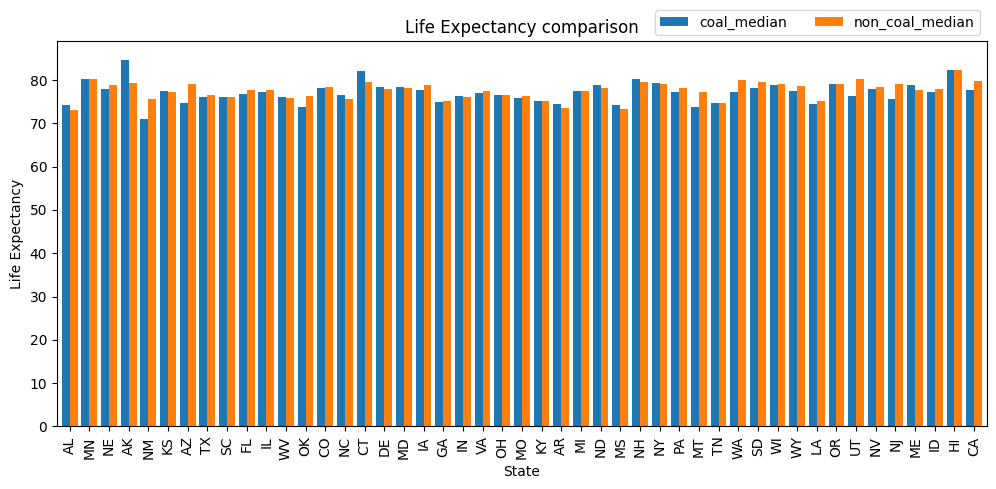

In [13]:

dict_df.plot.bar(y=['coal_median','non_coal_median'], ylabel='Life Expectancy', xlabel='State', title='Life Expectancy comparison',\
                figsize=(12,5), width= 0.8 )
plt.legend(bbox_to_anchor=(1.0,1.1), ncol=2)
plt.show()

<Axes: >

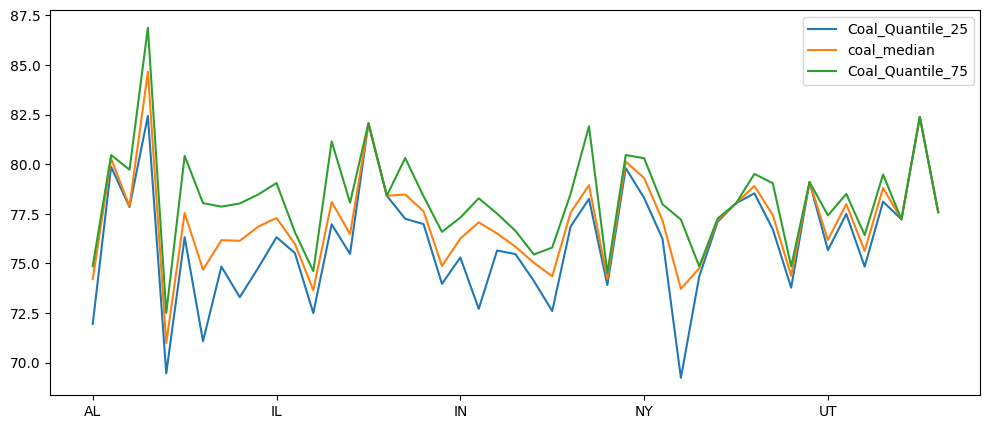

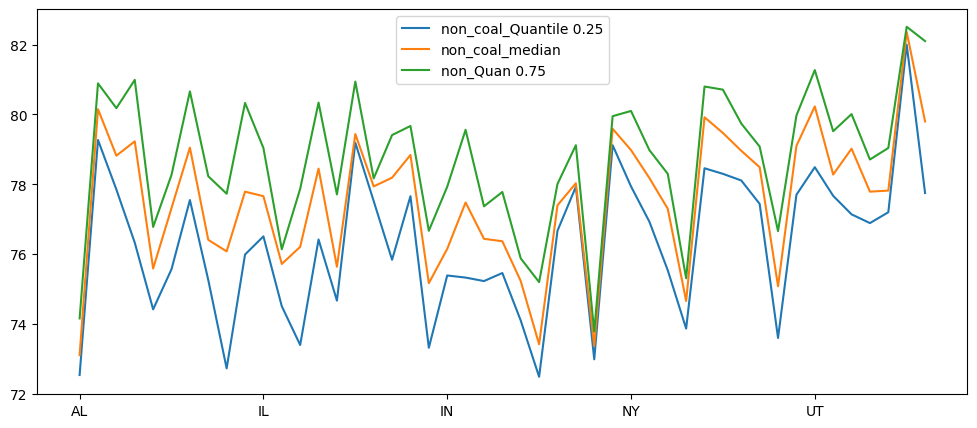

In [14]:
dict_df.plot.line(y=['Coal_Quantile_25', 'coal_median', 'Coal_Quantile_75'],figsize=(12,5))
dict_df.plot.line(y=['non_coal_Quantile 0.25', 'non_coal_median', 'non_Quan 0.75'],figsize=(12,5))

Text(0, 0.5, 'Quantile Range')

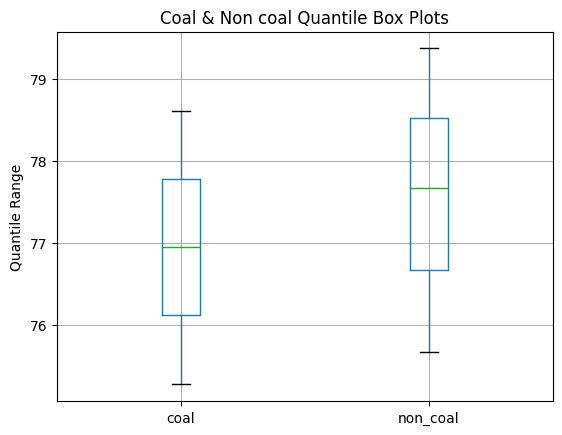

In [15]:
ddf = pd.DataFrame({'coal':[coal_expectancy_25th, coal_expectancy_50th,coal_expectancy_75th],
                'non_coal': [non_coal_expectancy_25th, non_coal_expectancy_50th, non_coal_expectancy_75th]})

ddf.boxplot()
plt.title('Coal & Non coal Quantile Box Plots')
plt.ylabel('Quantile Range')


###  Calculate the correlation and the statistical significance of the correlation.

In [16]:
adjusted_plants = power_plants.filter(items=["State","Plant_county","Burned_coal"])
adjusted_plants = adjusted_plants.rename(columns={"Plant_county": "County"})
adjusted_plants = pd.merge(adjusted_plants, mortality_df)
adjusted_plants = adjusted_plants.drop(adjusted_plants.iloc[:, 7:], axis=1)
adjusted_plants = adjusted_plants.filter(items=["State","County","Burned_coal","Life Expectancy"])
adjusted_plants["Burned_coal"] = adjusted_plants["Burned_coal"].replace({"Yes": 1,"No": 0})
adjusted_plants["Life Expectancy"] = adjusted_plants["Life Expectancy"].astype(float)
adjusted_plants["Burned_coal"] = adjusted_plants["Burned_coal"].astype(float)
adjusted_plants = adjusted_plants.dropna()
r = pearsonr(adjusted_plants["Burned_coal"],adjusted_plants["Life Expectancy"])
print(r)

PearsonRResult(statistic=-0.14358647013408, pvalue=5.84474308223577e-17)


There is a negative correlation between the existence of a coal power plant and life expectancy. This finding is statistically significant because of the low p-value.

### Calculate a T-test

In [17]:
#t-test
coal_data = coal_merge_1['Life Expectancy'].astype(float)
non_coal = non_coal_merge_1['Life Expectancy'].astype(float)
t_stat, p_val = ttest_ind(coal_data, non_coal, equal_var=False)
print(f't-statistic: {t_stat}, p-value: {p_val}')


t-statistic: -3.601958813208052, p-value: 0.0003505933225515664


&emsp;The t-statistic measures the difference between the means of the two groups being compared (in this case, the life expectancy of towns with coal power plants versus towns with non-coal power plants) relative to the group variability. A more significant absolute value of the t-statistic indicates a significant difference between the means of the two groups.

&emsp;The p-value represents the probability of observing a t-statistic as extreme as the one computed, assuming that the null hypothesis is true. In this case, the null hypothesis is that there is no difference in life expectancy between towns with coal power plants and towns with non-coal power plants. A smaller p-value indicates more substantial evidence against the null hypothesis. It thus supports the alternative hypothesis that there is a difference in life expectancy between the two groups.  

&emsp; Based on the t-test output (t-statistic: -3.601958813208052, p-value: 0.0003505933225515664), we can conclude that there is a statistically significant difference in life expectancy between towns with coal power plants and towns with non-coal power plants. The negative sign of the t-statistic indicates that the mean life expectancy of towns with coal power plants is lower than that of towns with non-coal power plants; corelating with the results from the PearsonR calculation. The small p-value suggests that this difference is unlikely to have occurred by chance alone.

## *Conclusion*
Based on our data analysis, mortality rate of counties within the United States that have coal-burning energy plants are lower than those without coal-burning energy plants. Futhermore, The data calculated in this study shows a correlation between lower life expectancy in counties with coal-burning energy plants compared to counties without alternative energy producing plants. With this conclusion, further studies are required to further calculate the impact of coal energy plants towards the populations mortality rates as well as if there are increased hospital rates, diseases, and or any other illnesses that may occur in or around counties that have Coal burning energy plants.

## Sources

Union of Concerned Scientists. (2017, November 15). Coal Power Impacts. Union of Concerned Scientists. Retrieved March 22, 2023, from https://www.ucsusa.org/resources/coal-power-impacts

United States Environmental Protection Agency. (2022, July 26). Cleaner Power Plants. Retrieved from Mercury and Air Toxics Standards: https://www.epa.gov/mats/cleaner-power-plants

United States Environmental Protection Agency. (2023, February 16). Power Plants and Neighboring Communities. Retrieved March 22, 2023, from https://www.epa.gov/airmarkets/power-plants-and-neighboring-communities#additional

University of Wisconsin Population Health Institute. (2022). Explore health rankings: Rankings Data & Documentation. County Health Rankings & Roadmaps. Retrieved March 22, 2023, from https://www.countyhealthrankings.org/explore-health-rankings/rankings-data-documentation 

U.S. Energy Information Administration . (2022, November 16). Coal explained, Coal and the Environment. Retrieved from U.S. Energy Information Administration : https://www.eia.gov/energyexplained/coal/coal-and-the-environment.php#:~:text=The%20U.S.%20Energy%20Information%20Administration,from%20the%20electric%20power%20sector.

U.S. Energy Information Administration. (2023, March 7). Short-Term Energy Outlook: Coal. Short-Term Energy Outlook - U.S. Energy Information Administration (EIA). Retrieved March 22, 2023, from https://www.eia.gov/outlooks/steo/report/coal.php
